In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


In [ ]:

model=load_model(r'best_model.h5')

faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={
    0:'Angry', 
    1:'Disgust', 
    2:'Fear', 
    3:'Happy',
    4:'Neutral',
    5:'Sad',
    6:'Surprise'
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


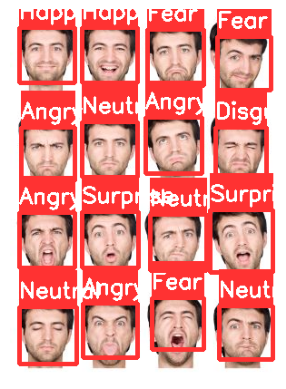

In [37]:

# len(number_of_image), image_height, image_width, channel

frame = cv2.imread(r"D:\CODE\PYTHON\Project\Facial_Emotion\Facial Emotion\pic2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = faceDetect.detectMultiScale(gray, 1.3, 4)
for x, y, w, h in faces:
    sub_face_img = gray[y:y+h, x:x+w]
    resized = cv2.resize(sub_face_img,(48,48))
    normalize = resized/255.0
    reshaped = np.reshape(normalize, (1, 48, 48, 1))
    result = model.predict(reshaped)
    label = np.argmax(result, axis=1)[0]
    # print(label)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (50,50,255),3)
    cv2.rectangle(frame,(x,y-40),(x+w,y),(50,50,255),-1)
    cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()